In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pywt
from sklearn.model_selection import cross_val_predict
%matplotlib inline

In [2]:
for dirname, _, filenames in os.walk(r'C:\Users\przem\Desktop\best_tennis_players_recognition\model\dataset\rafael-nadal\rafael-nadal (1).jpg'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
img = cv2.imread(r'C:\Users\przem\Desktop\best_tennis_players_recognition\model\dataset\rafael-nadal\rafael-nadal (1).jpg')

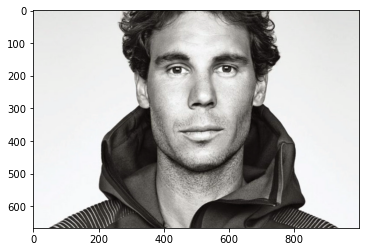

In [4]:
plt.imshow(img)

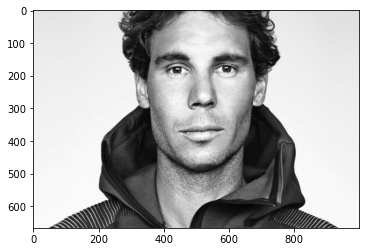

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\przem\Desktop\best_tennis_players_recognition\model\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\przem\Desktop\best_tennis_players_recognition\model\opencv\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[331,  32, 384, 384]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(331, 32, 384, 384)

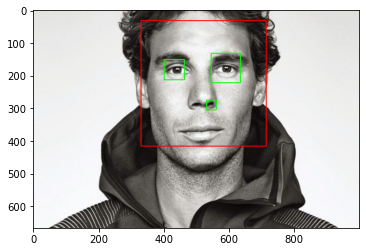

In [8]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

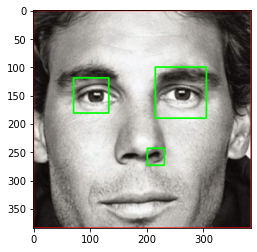

In [9]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [11]:
path_to_data = "C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\dataset"
path_to_cropped_data = "C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\cropped"

In [12]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [13]:
img_dirs

['C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\dataset\\daniil-medvedev',
 'C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\dataset\\novak-djokovic',
 'C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\dataset\\rafael-nadal',
 'C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\dataset\\stefanos-tsitsipas']

In [14]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [15]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + "\\" + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

daniil-medvedev
Generating cropped images in folder:  C:\Users\przem\Desktop\best_tennis_players_recognition\model\cropped\daniil-medvedev
novak-djokovic
Generating cropped images in folder:  C:\Users\przem\Desktop\best_tennis_players_recognition\model\cropped\novak-djokovic
rafael-nadal
Generating cropped images in folder:  C:\Users\przem\Desktop\best_tennis_players_recognition\model\cropped\rafael-nadal
stefanos-tsitsipas
Generating cropped images in folder:  C:\Users\przem\Desktop\best_tennis_players_recognition\model\cropped\stefanos-tsitsipas


In [16]:
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

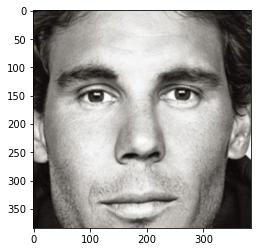

In [17]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Users\przem\Desktop\best_tennis_players_recognition\model\dataset\rafael-nadal\rafael-nadal (1).jpg')
plt.imshow(cropped_image)

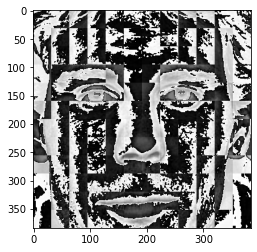

In [18]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [19]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [20]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'daniil-medvedev': ['C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\cropped\\daniil-medvedev\\daniil-medvedev1.jpg',
  'C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\cropped\\daniil-medvedev\\daniil-medvedev10.jpg',
  'C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\cropped\\daniil-medvedev\\daniil-medvedev11.jpg',
  'C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\cropped\\daniil-medvedev\\daniil-medvedev12.jpg',
  'C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\cropped\\daniil-medvedev\\daniil-medvedev13.jpg',
  'C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\cropped\\daniil-medvedev\\daniil-medvedev14.jpg',
  'C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\cropped\\daniil-medvedev\\daniil-medvedev15.jpg',
  'C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\model\\cropped\\daniil-medvedev\\daniil-medvedev16.jpg',
  'C:\\Users\\przem\\D

In [21]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'daniil-medvedev': 0,
 'novak-djokovic': 1,
 'rafael-nadal': 2,
 'stefanos-tsitsipas': 3}

In [22]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [23]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(195, 4096)

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10, probability=True))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8571428571428571

In [26]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.88      1.00      0.93        14
           2       0.83      1.00      0.91        15
           3       0.83      0.77      0.80        13

    accuracy                           0.86        49
   macro avg       0.89      0.80      0.81        49
weighted avg       0.87      0.86      0.84        49



In [27]:
import joblib
joblib.dump(pipe, r'C:\Users\przem\Desktop\best_tennis_players_recognition\saved_model.pkl') 

['C:\\Users\\przem\\Desktop\\best_tennis_players_recognition\\saved_model.pkl']

In [28]:
import json
with open(r'C:\Users\przem\Desktop\best_tennis_players_recognition\class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))